In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
os.chdir("D:\Module 6\ML")

In [3]:
credit_gem = pd.read_csv('germancredit.csv')

# Data description
The business meaning of each column in the data is as below

- Default: Whether the issued loan was a good decision or bad
- checkingstatus: Status of existing checking account.
- duration: Duration of loan in months
- history: Credit history of the applicant
- purpose: Purpose for the loan
- amount: Credit amount
- savings: Savings account/bonds
- employ: Present employment since
- installment: Installment rate in percentage of disposable income
- status: Personal status and sex
- others: Other debtors / guarantors for the applicant
- residence: Present residence since
- property: Property type of applicant
- age: Age in years
- otherplans: Other installment plans
- housing: Housing
- cards: Number of existing credits at this bank
- job: Job
- liable: Number of people being liable to provide maintenance for
- tele: Is the Telephone registered or not
- foreign: Is the applicant a foreign worker

In [6]:
credit_gem.head(10)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [18]:
credit_gem.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [19]:
credit_gem.describe(include=[object])

,checkingstatus1,history,purpose,savings,employ,status,others,property,otherplans,housing,job,tele,foreign
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [21]:
categorical_features = [column_name for column_name in credit_gem.columns if credit_gem[column_name].dtype == 'O']
credit_gem[categorical_features].isnull().sum() 

checkingstatus1    0
history            0
purpose            0
savings            0
employ             0
status             0
others             0
property           0
otherplans         0
housing            0
job                0
tele               0
foreign            0
dtype: int64

In [22]:
credit_gem.nunique()

Default              2
checkingstatus1      4
duration            33
history              5
purpose             10
amount             921
savings              5
employ               5
installment          4
status               4
others               3
residence            4
property             4
age                 53
otherplans           3
housing              3
cards                4
job                  4
liable               2
tele                 2
foreign              2
dtype: int64

In [7]:
credit_gem.shape

(1000, 21)

In [27]:
credit_gem.dtypes

Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            object
dtype: object

**Check if any duplicate rows**

In [17]:
# Removing duplicate rows if any
credit_gem = credit_gem.drop_duplicates()
print('Shape After deleting duplicate values:', credit_gem.shape)

Shape After deleting duplicate values: (1000, 21)


# EDA

<AxesSubplot:xlabel='Default'>

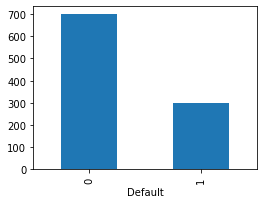

In [13]:
GroupedData = credit_gem.groupby('Default').size()
GroupedData.plot(kind = 'bar', figsize = (4,3))

In [82]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    
    fig, subPlot= plt.subplots(nrows = 1, ncols = len(colsToPlot), figsize = (20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind = 'bar',ax = subPlot[plotNumber])

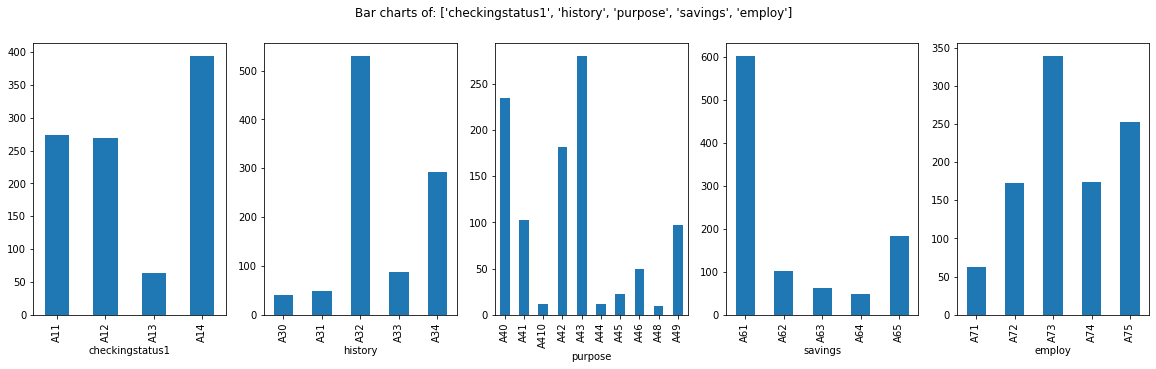

In [31]:
PlotBarCharts(inpData = credit_gem, 
              colsToPlot = ['checkingstatus1', 'history', 'purpose','savings','employ'])

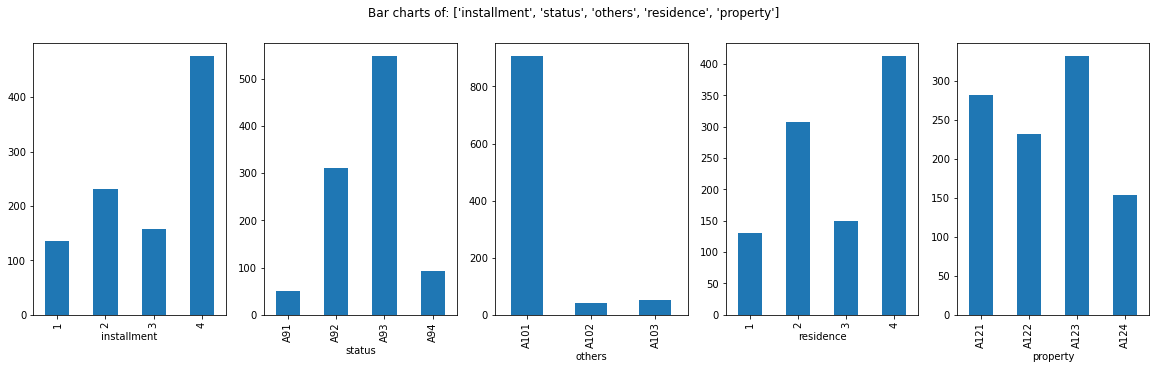

In [32]:
PlotBarCharts(inpData = credit_gem, 
              colsToPlot = ['installment', 'status', 'others','residence', 'property'])

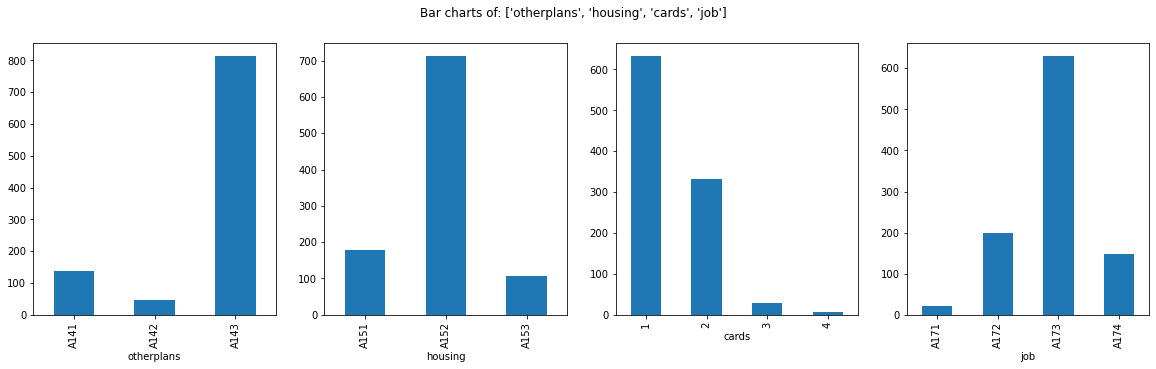

In [33]:
PlotBarCharts(inpData = credit_gem, 
              colsToPlot = ['otherplans', 'housing', 'cards', 'job'])

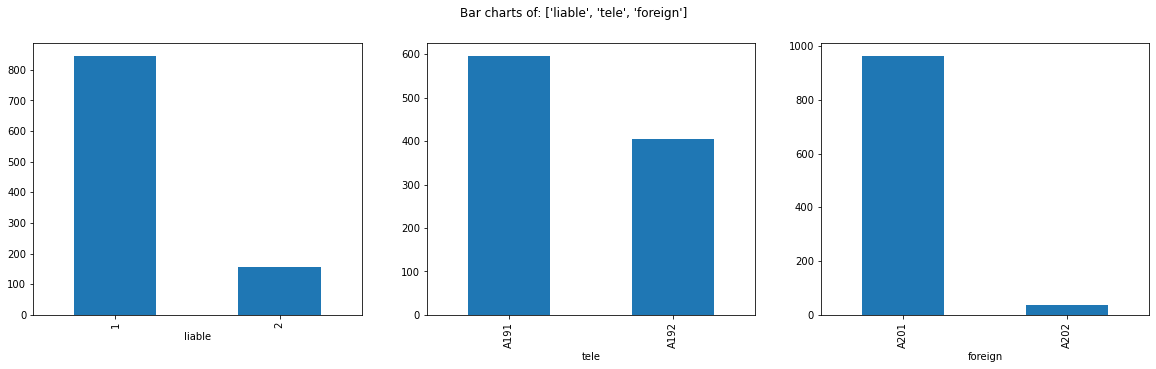

In [34]:
PlotBarCharts(inpData  = credit_gem, 
              colsToPlot = ['liable', 'tele', 'foreign'])

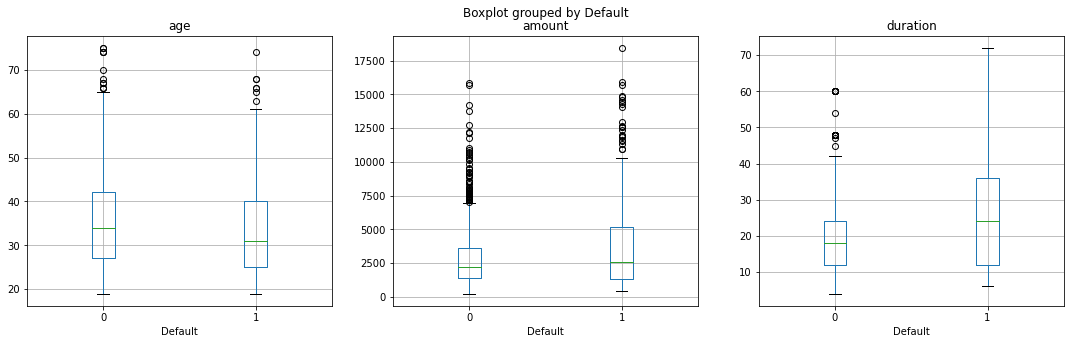

In [26]:
ContinuousColsList = ['age','amount', 'duration']
fig, PlotCanvas = plt.subplots(nrows = 1, ncols = len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Default"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    credit_gem.boxplot(column = PredictorCol, by = 'Default', figsize = (5,5), vert = True, ax = PlotCanvas[i])

#### Finding outliers in the data

In [28]:
Q1 = credit_gem.quantile(0.25)
Q3 = credit_gem.quantile(0.75)
IQR = Q3 - Q1
((credit_gem < (Q1 - 1.5 * IQR)) | (credit_gem > (Q3 + 1.5 * IQR))).sum()

Default              0
age                 23
amount              72
cards                6
checkingstatus1      0
duration            70
employ               0
foreign              0
history              0
housing              0
installment          0
job                  0
liable             155
otherplans           0
others               0
property             0
purpose              0
residence            0
savings              0
status               0
tele                 0
dtype: int64

#### Data contains outliers in the following
- age
- amount
- duration

### Outlier treatment

<AxesSubplot:>

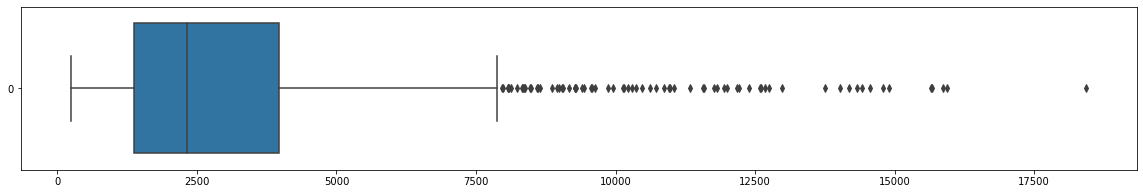

In [39]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20,3)
sns.boxplot(data = credit_gem["amount"], orient = "h")

<AxesSubplot:>

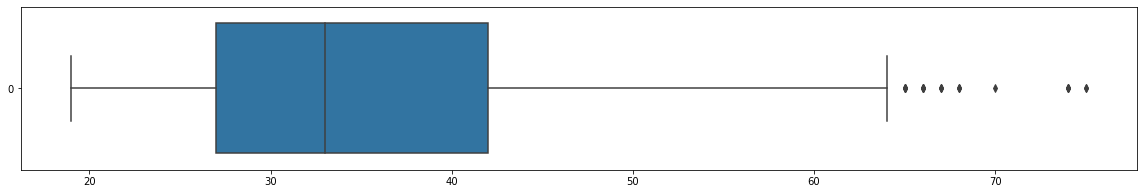

In [40]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20,3)
sns.boxplot(data = credit_gem["age"], orient = "h")

<AxesSubplot:>

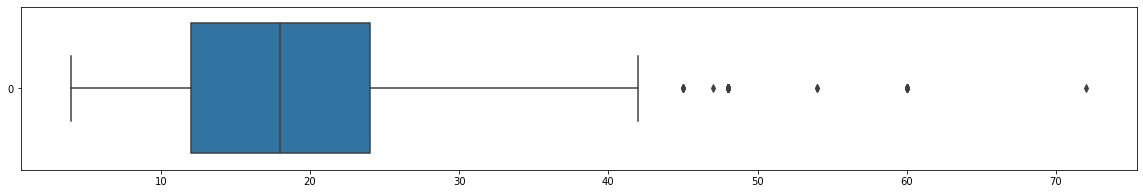

In [41]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20,3)
sns.boxplot(data = credit_gem["duration"], orient = "h")

#### Capping the outliers

In [44]:
Q1 = credit_gem['age'].quantile(0.25)
Q3 = credit_gem['age'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
credit_gem['age'] = credit_gem['age'].mask(credit_gem['age']<lr, lr, )
credit_gem['age'] = credit_gem['age'].mask(credit_gem['age']>ur, ur, )

In [45]:
Q1 = credit_gem['amount'].quantile(0.25)
Q3 = credit_gem['amount'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
credit_gem['amount'] = credit_gem['amount'].mask(credit_gem['amount']<lr, lr, )
credit_gem['amount'] = credit_gem['amount'].mask(credit_gem['amount']>ur, ur, )

In [46]:
Q1 = credit_gem['duration'].quantile(0.25)
Q3 = credit_gem['duration'].quantile(0.75)
IQR=Q3-Q1
lr= Q1-(1.5 * IQR)
ur= Q3+(1.5 * IQR)
credit_gem['duration'] = credit_gem['duration'].mask(credit_gem['duration']<lr, lr, )
credit_gem['duration'] = credit_gem['duration'].mask(credit_gem['duration']>ur, ur, )

In [50]:
credit_gem = pd.get_dummies(credit_gem, columns=['checkingstatus1', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'job', 'tele', 'foreign'])

In [51]:
X = credit_gem.drop(['Default'],axis=1)
y = credit_gem['Default']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [53]:
y_train.value_counts()

0    558
1    242
Name: Default, dtype: int64

In [54]:
y_test.value_counts()

0    142
1     58
Name: Default, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [56]:
X_test = scaler.transform(X_test)

# Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

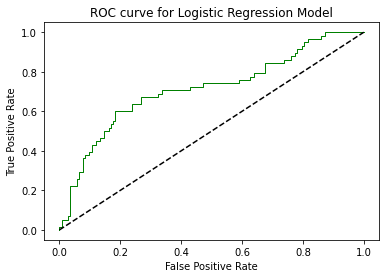

In [58]:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [59]:
pd.DataFrame({"fpr":fpr, "tpr":tpr, "threshold":thresholds})

,fpr,tpr,threshold
0,0.000000,0.000000,1.957759
1,0.000000,0.017241,0.957759
2,0.007042,0.017241,0.956149
3,0.007042,0.051724,0.946798
4,0.028169,0.051724,0.920621
...,...,...,...
68,0.859155,0.965517,0.025321
69,0.859155,0.982759,0.024933
70,0.873239,0.982759,0.023845
71,0.873239,1.000000,0.022340


In [60]:
thresholds[np.argmax(tpr - fpr)]

0.49131263534757785

In [62]:
pred_proba = y_pred_logreg_proba[:,1]

In [63]:
preds = np.where(pred_proba>0.492, 1, 0)

Model accuracy: 0.75


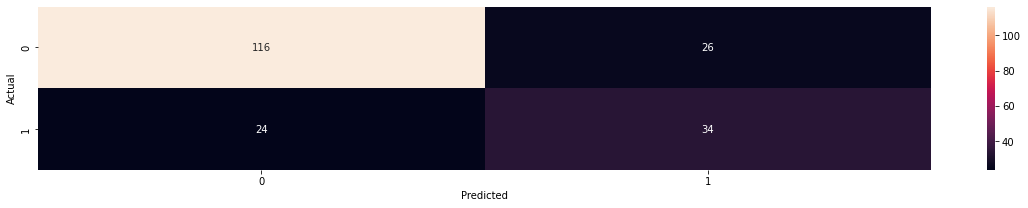

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, preds)
s = sns.heatmap(cm ,annot=True ,fmt='d')
s.set(xlabel='Predicted', ylabel='Actual')
print("Model accuracy:",accuracy_score(y_test, preds))

#### We are geeting model accuracy of 75% in logistic regression

# Decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
classifier_dt = DecisionTreeClassifier(max_depth=8,random_state=0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [67]:
y_pred_logreg_proba_dt = classifier_dt.predict_proba(X_test)
y_pred_logreg_proba_dt

array([[0.16438356, 0.83561644],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.94285714, 0.05714286],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.7       , 0.3       ],
       [0.16438356, 0.83561644],
       [0.94285714, 0.05714286],
       [1.        , 0.        ],
       [0.16438356, 0.83561644],
       [0.        , 1.        ],
       [0.94285714, 0.05714286],
       [1.        , 0.        ],
       [0.64864865, 0.35135135],
       [1.        , 0.        ],
       [0.16438356, 0.83561644],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.16438356, 0.83561644],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.16438356, 0.83561644],
       [1.

In [68]:
y_pred_logreg_val_dt = classifier_dt.predict(X_test)
y_pred_logreg_val_dt

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

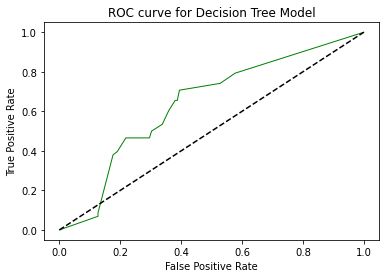

In [69]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_logreg_proba_dt[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_dt,tpr_dt,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Decision Tree Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [70]:
pred_proba_dt = y_pred_logreg_proba_dt[:,1]

In [71]:
preds_dt = np.where(pred_proba_dt>0.70, 1, 0)

Model accuracy: 0.69


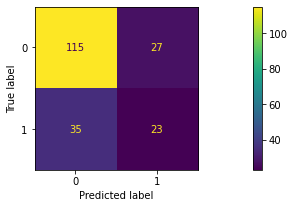

In [72]:
cm_dt = confusion_matrix(y_test, preds_dt)
ConfusionMatrixDisplay(confusion_matrix = cm_dt).plot()
print("Model accuracy:",accuracy_score(y_test, preds_dt))

#### We are geeting model accuracy of 69% in decision tree

# Randon forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
classifier_rf = RandomForestClassifier(n_estimators= 20 ,max_depth=8, random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=0)

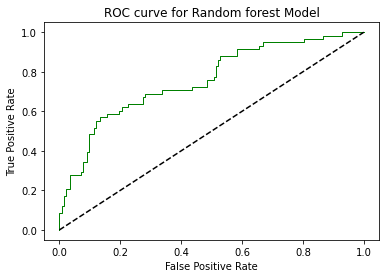

In [76]:
y_pred_logreg_proba_rf = classifier_rf.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_logreg_proba_rf[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr_rf,tpr_rf,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [77]:
pred_proba_rf = y_pred_logreg_proba_rf[:,1]

In [78]:
preds_rf = np.where(pred_proba_rf>0.70, 1, 0)

Model accuracy: 0.725


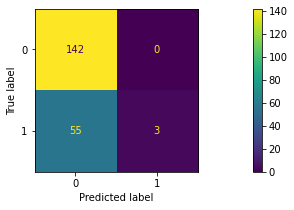

In [79]:
cm_rf = confusion_matrix(y_test, preds_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()
print("Model accuracy:",accuracy_score(y_test, preds_rf))

#### We are getting model accuracy of 72% in random forest